## Saheed Adisa Ganiyu
### Home Work #5 (Problem 25.1, and 25.2)

**Problem 25.1.** Using Metropolis algorithm, simulate a Markov chain with $P(x)=\exp (-x), x \geq 0$ density and transition function $T\left(x^{\prime} \mid x\right)=\exp \left(-\left(x^{\prime}-x\right)^2 / 2 \sigma^2\right) / \sqrt{2 \pi} \sigma$ (with appropriate acceptance probability $A\left(x^{\prime} \mid x\right)$ ). Find $\sigma$ that minimizes $K_{x x}(1)=\mathrm{E}\left(x_m-1\right)\left(x_{m-1}-1\right)$, where $x_m$ is the state of the Markov chain at time $m$.

In [2]:
# Importing the necessary library
%matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

/tmp/ipykernel_29804/1020754153.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-x)
/tmp/ipykernel_29804/1020754153.py:12: RuntimeWarning: invalid value encountered in double_scalars
  a = min(1, p(xp)*T(x[m-1], xp, sigma) / (p(x[m-1])*T(xp, x[m-1], sigma)))


sigma_min: 0.1
sigma_max: 2.704081632653061


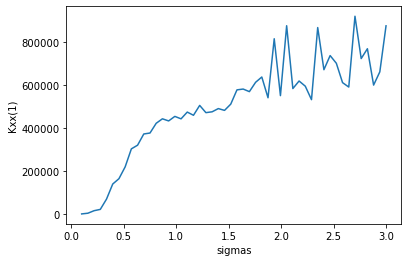

In [7]:
def p(x):  # Probability density
    return np.exp(-x)

def T(x, xp, sigma):  # Transition function
    return np.exp(-(xp - x)**2 / (2*sigma**2)) / np.sqrt(2*np.pi*sigma**2)

def metropolis(n, sigma):  # Metropolis Algorithm
    x = np.zeros(n)
    x[0] = np.random.uniform()
    for m in range(1, n):
        xp = x[m-1] + np.random.normal(scale=sigma)
        a = min(1, p(xp)*T(x[m-1], xp, sigma) / (p(x[m-1])*T(xp, x[m-1], sigma)))
        if np.random.uniform() <= a:
            x[m] = xp
        else:
            x[m] = x[m-1]
    return x

def K1(x):  # Auto covariance
    return np.mean((x[1:] - 1)*(x[:-1] - 1))

n = 10000
sigmas = np.linspace(0.1, 3, 50)
K1s = np.zeros_like(sigmas)
for i, sigma in enumerate(sigmas):
    x = metropolis(n, sigma)
    K1s[i] = K1(x)

sigma_min = sigmas[np.argmin(K1s)]
sigma_max = sigmas[np.argmax(K1s)]
print(f"sigma_min: {sigma_min}")
print(f"sigma_max: {sigma_max}")
plt.plot(sigmas,K1s)
plt.ylabel("Kxx(1)")
plt.xlabel("sigmas")
plt.show()

**Observation:** Here, we found minimum of Kxx(1) at $\sigma = 0.1$, and its maximum at $\sigma = 2.7041$.

**Problem 25_2.** Using either Metropolis algorithm or Glauber dynamics, simulate a MCMC for 2D Ising model on a $L \times L$ torus of binary variables/spins. Compute and plot as a function of temperature $T$ (e.g., for $2 \leq T \leq 2.6$ ) the average value of $m(T)=\left|\sum_n \sigma_n\right| / L^2$ for $L=32,64$, and 128. Is the transition from non-zero to [almost] zero value of $m(T)$ becomes sharper for larger $L$ ?

**Solution:** Using Metropolis algorithim, which is basically described for 2D Ising model as follows: 

1. Prepare an initial configuration of $\mathrm{N}$ spins
2. Flip the spin of a randomly chosen lattice site.
3. Calculate the change in energy $\mathrm{dE}$.
4. If $\mathrm{dE}<0$, accept the move. Otherwise accept the move with probability $\exp ^{\{-\mathrm{dE} / \mathrm{T}\}}$. This satisfies the detailed balance condition, ensuring a final equilibrium state.
5. Repeat 2-4.


In [49]:
# Defining the necessary functions 
def initialstate(N):   
    ''' generates a random spin configuration for initial condition'''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state


def metropolis(config, N, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nbr = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                dE = 2*s*nbr
                if dE < 0:
                    s *= -1
                elif rand() < np.exp(-dE*beta):
                    s *= -1
                config[a, b] = s
    return config


def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag

In [32]:
# Defining the parameters
nt = 40         #  number of temperature points
L =  np.array([32,64,128])       #  size of the lattice, N x N
eqSteps = 1024       #  number of MC sweeps for equilibration
mcSteps = 1024       #  number of MC sweeps for calculation

T = np.linspace(2, 2.6, nt); 

n1 = 1.0/(mcSteps*N*N)

MM = []
for N in L:
    M = np.zeros(nt)
    for tt in range(nt):
        M1= 0
        config = initialstate(N)
        beta=1.0/T[tt]
    
        for i in range(eqSteps):         # equilibrate
            metropolis(config, N, beta)          # Monte Carlo moves

        for i in range(mcSteps):
            metropolis(config, N, beta)           
            Mag = calcMag(config)        # calculate the magnetisation

            M1 = M1 + Mag

        M[tt] = n1*M1
    MM.append(M)

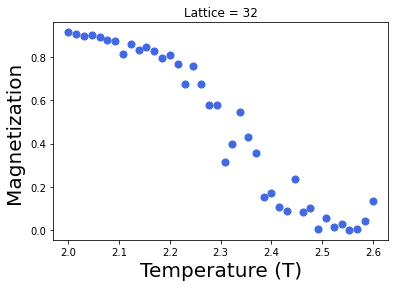

In [46]:
plt.scatter(T, abs(MM[0]), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight')
plt.title("Lattice = 32")
plt.show()

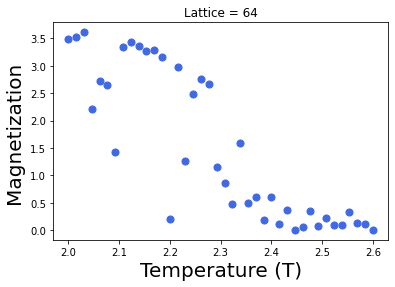

In [47]:
plt.scatter(T, abs(MM[1]), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight')
plt.title("Lattice = 64")
plt.show()

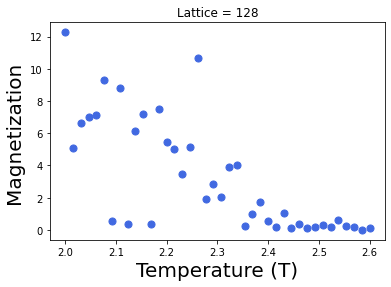

In [48]:
plt.scatter(T, abs(MM[2]), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight')
plt.title("Lattice = 128")
plt.show()

**Answer:** Yes, the transition becomes sharper for larger $L$. This is known as the finite-size scaling behavior of the 2D Ising model, which means that as the system size $L$ increases, the value of $m(T)$ decreases more rapidly near the critical temperature.

**Observation:** This code takes some hour before it complete, which made me to reduce the number of steps from my intended $10,000,000$ to $1,024$ steps. I know that, larger steps gives better result.